# Big Data Analytics Praktikum 4

**Dataframes** 

### Arbeitsanweisung

Bereiten Sie Ihr Wissen über Dataframes mit pandas auf und arbeiten Sie mit dem Datensatz Iris. Platzieren Sie Ihre Lösungen in den vorgegeben Zellen, so dass der darin ausgeführte Code die geforderte Ausgabe produziert. Liefern Sie auch aussagekräftiges Markdown den Aufgaben.

----
Für diese Aufgabe stehen die folgenden Dateien in der JupyterLab-Umgebung zur Verfügung:

* `Big_Data_Analytics_1/datasets/iris/*`<br>Iris-Datensatz

## Aufgabe 4

1. Erarbeiten Sie sich das nötige Wissen zum Einlesen von Daten in einen `pandas Dataframe` (z.B. aus „Python for Data Analysis“ (bzw. der deutschen Ausgabe)).

2. Laden sie den Iris-Datensatz in einen Dataframe und geben Sie grundlegende Statistiken zu den Daten aus (wie geht das einfach mit einem Dataframe?).

3. Visualisieren Sie den Datensatz
    1.  Als Scattermatrix (mittels des python Paketes `matplotlib`)
    2.  Als Boxplots für die einzelnen Spalte des Datensatzes


4. Welche Schlüsse können Sie aus den Daten und deren Visualisierungen hinsichtlich einer möglichen Klassifikation der Daten ziehen?

In der Aufgabe 2 haben wir erst die benötigten Bibliotheken importiert: `pandas`, `seaborn` und `matplotlib`. Dann haben wir die Datei `data.all` mit der Funktion `read_csv()` gelesen, wobei wir die Werte mit einem Leerzeichen getrennt und unsere eigene Headers gesetzt haben. Zum Schluss geben wir den Datensatz als eine Tabelle aus. <br>
Aus der Tabelle kann man schlussfolgern, dass wir 150 Elemente haben und für den einzelnen Element gibt es Messungen der Sepal length `(sl)`, Sepal Width `(sw)`, Petal Length `(pl)` und Petal Width `(pw)`.

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data.all', sep=' ', header=None)
df.columns = ['sl', 'sw', 'pl', 'pw', 'class']
df

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Wir haben auch die statistischen Eigenschaften des einzelnen Parameters wie die Anzahl, Durchschnittswert, Median, Q1, Q3, minimaler und maximaler Wert ausgegeben. Diese Werte helfen uns die Grafiken aus den nächsten Aufgaben besser zu verstehen.

In [4]:
df.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sl,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sw,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
pl,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
pw,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


Wir benutzen `Seaborn` Bibliothek, um ein Scattermatrix darzustellen, weil sie einfach zu benutzen und für den Zweck der schöneren Darstellung der Scattermatrizen bzw. einer Dataframe mit numerischen sowie multiple-valued Datentypen besser geeignet ist. Dafür benutzen wir die Funktion `pairplot()`, wobei wir unter `hue` die Klassen der Pflanzen definieren.<br>
Man kann aus den Grafiken sehen, wie `Iris-setosa` vergleichsweise längeren Kelchblatt (Sepal Length) und Blütenblatt (Petal length) hat. Es ist auch bemerkenswert, dass die Werte von `Iris-virginica` und `Iris-versicolor` sich in mehreren Stellen oft treffen, woraus man vermuten kann, dass sie sich von Größe her ähneln.

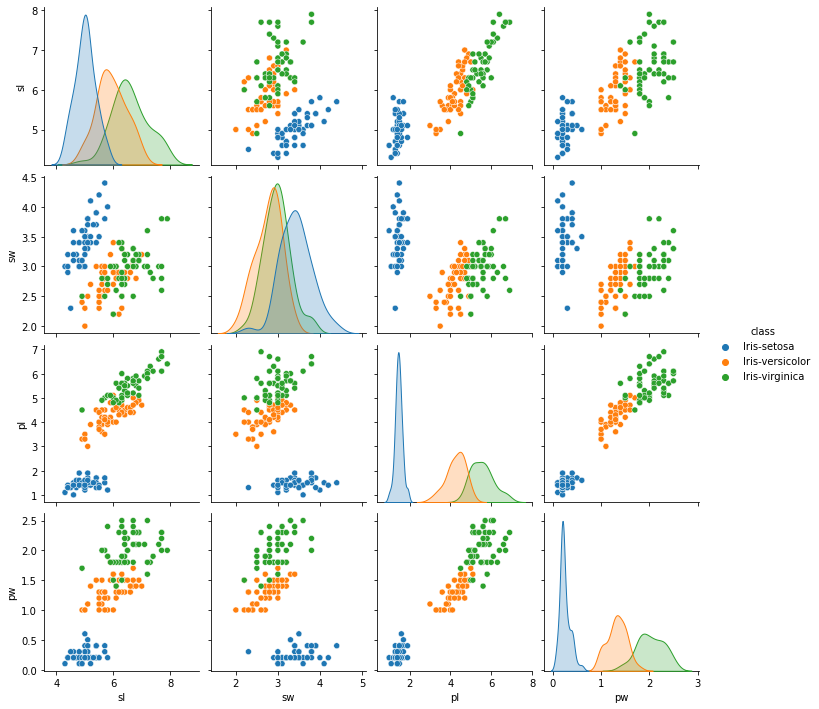

In [137]:
sns.pairplot(data=df, hue='class')
plt.show()

Im folgenden haben wir den Graph mit der Benutzung ausschließlich von matplotlib dargestellt. Dafür nutzen wir die Funktion `scatter_matrix()`.

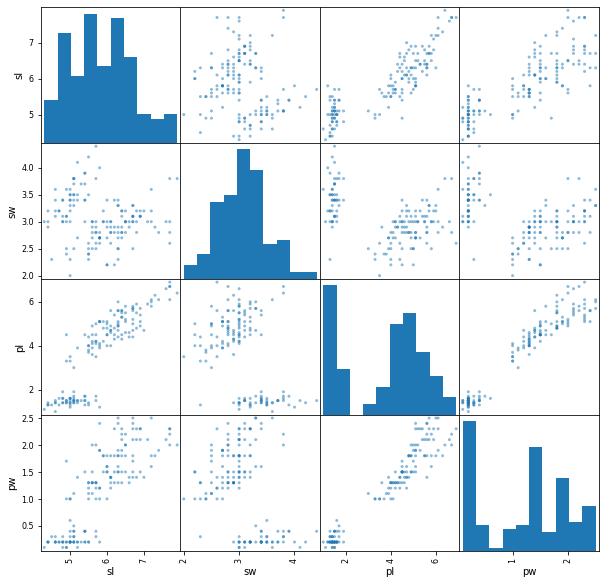

In [138]:
pd.plotting.scatter_matrix(df, figsize=(10,10))
plt.show()

Den Graph aus der Aufgabe 3B stellen wir als Boxplot dar. Wir iterieren den Dataframe, wobei wir die letzte Spalte überspringen, weil sie aus Daten mit multi-valued Datentyp besteht. Mit der Funktion `figure()` machen wir die Grafik größer, um die Benutzbarkeit und Lesbarkeit zu erschaffen. Dann mithilfe von Funktion `boxplot()` lässt sich die Boxplot Grafik zu erstellen, wobei in Parametern wir die x und y Werte bestimmen.<br>

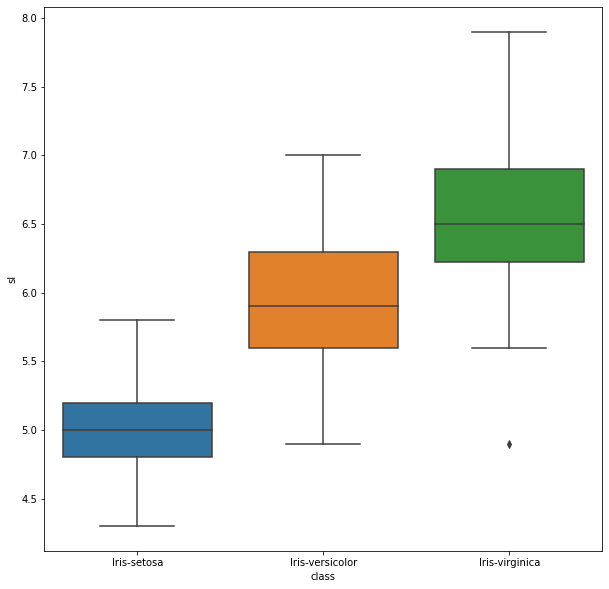

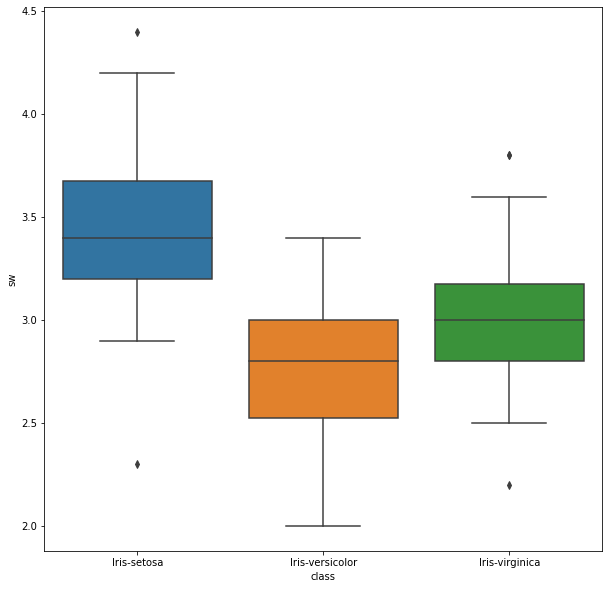

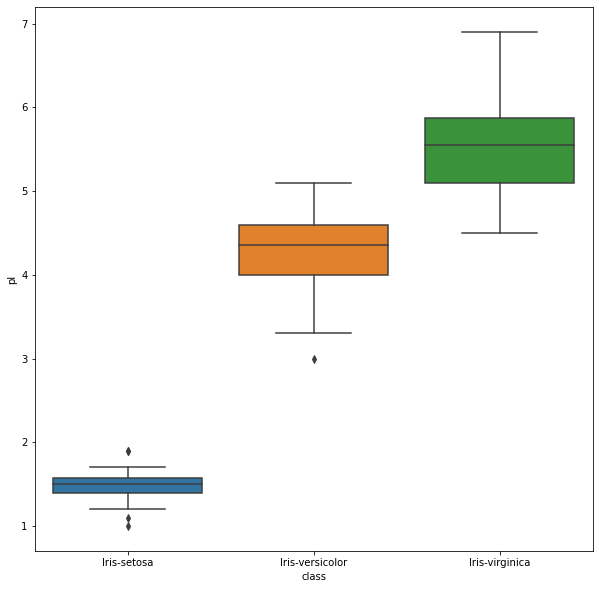

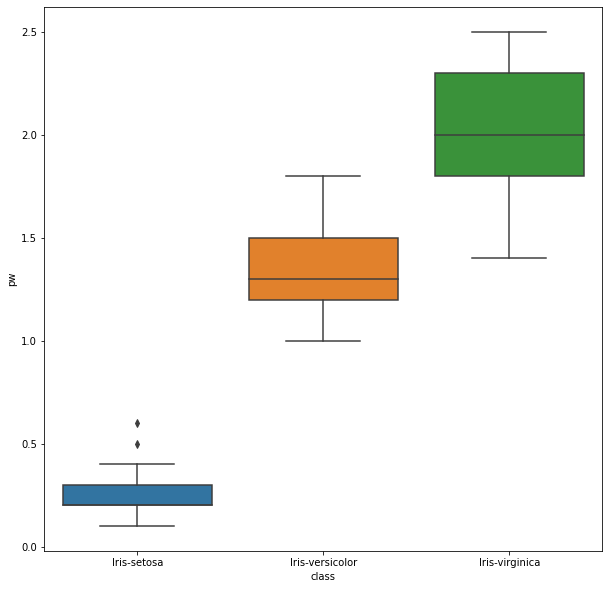

In [139]:
for i in df.iloc[:,:-1]:
    plt.figure(figsize=(10,10))
    sns.boxplot(data=df.iloc[:,:-1], x=df['class'], y=df[i])
    plt.show()

Basierend auf die Daten, die wir in Grafiken dargestellt haben lassen sich einige Schlüsse hinsichtlich einer möglichen Klassifikation ziehen:
1. Relation der Daten: wie oben in der Aufgabe 2A erwähnt wurde, kann man mithilfe der Graphen den Zusammenhang zwischen den Klassen klar nachvollziehen. Scatterplots machen es leicht die Korrelation zwischen der Eigenschaften und Merkmalen der Klassen zu identifizieren.
2. Unterschiede: Wie die Relation, kann man auch die Unterschiede zwischen den jeweiligen Klassen ansehen. Scatterplots ermöglichen es, die Differenz zwischen den Merkmalen zu erkennen.
3. Ausreißer erkennen: Der Boxplot kann direkt den Ausreißer erkennen und dem Analysten Bescheid geben, dass diese Klassifikation besonders betrachtet werden soll.
4. Differenzierung mit Farben: es ermöglicht dem Analysten die Klassen schnell zu identifizieren, was aus der Tabelle nicht leicht erkennbar ist.

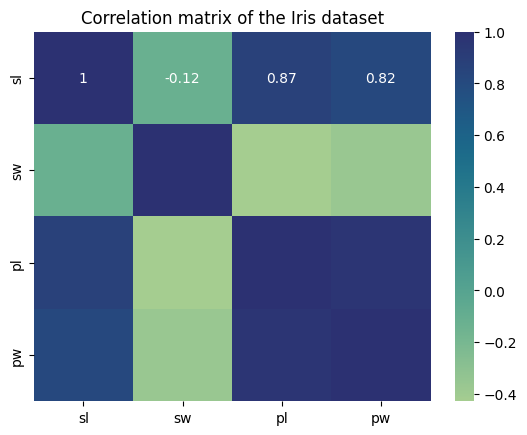

In [35]:
# only numerical values 
correlation_matrix = df.iloc[:,:4].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Correlation matrix of the Iris dataset')
plt.show()